## Setting
- 한글폰트 위해 나눔 글씨체 install 후 런타임 다시 시작
- CRNN은 괜찮지만 아래의 easyOCR predict 시에는 CPU보다 GPU가 빠름.(CPU로 실행해도 1~2분 내로 실행 됨)

In [7]:
# 한글 plot 출력위해 실행 후 런타임 다시 시작
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 2s (5,572 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 122531 files and di

## Recognition use CRNN
- 논문 github: https://github.com/bgshih/crnn#train-a-new-model
- python ver github: https://github.com/meijieru/crnn.pytorch

demo 예측으로 사용하는 pre-trained 모델은 숫자와 영어 소문자만 구분할 수 있는 모델로 recognition만 가능

In [ ]:
# 모듈 import
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image
!pip install lmdb
import lmdb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.2/299.2 kB 12.3 MB/s eta 0:00:00


In [ ]:
# CRNN을 python pytorch로 구현한 github clone
!git clone https://github.com/meijieru/crnn.pytorch
%cd crnn.pytorch

Cloning into 'crnn.pytorch'...
remote: Enumerating objects: 95, done.
remote: Counting objects: 100% (48/48), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 95 (delta 28), reused 27 (delta 22), pack-reused 47
Unpacking objects: 100% (95/95), 44.97 KiB | 1.28 MiB/s, done.
/content/crnn.pytorch


In [ ]:
# 미리 학습된 pth 파일 받아오기
%cd /content/crnn.pytorch/data
!wget https://github.com/PaulowniaTree/mini_project_4/raw/mmocr_custom/demo/crnn.pth

/content/crnn.pytorch/data
--2023-05-18 16:25:09--  https://github.com/PaulowniaTree/mini_project_4/raw/mmocr_custom/demo/crnn.pth
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/PaulowniaTree/mini_project_4/mmocr_custom/demo/crnn.pth [following]
--2023-05-18 16:25:09--  https://raw.githubusercontent.com/PaulowniaTree/mini_project_4/mmocr_custom/demo/crnn.pth
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 33351680 (32M) [application/octet-stream]
Saving to: ‘crnn.pth’

crnn.pth            100%[===================>]  31.81M  --.-KB/s    in 0.09s   

2023-05-18 16:25:14 (355 MB/s) - ‘crnn.pth’ sa

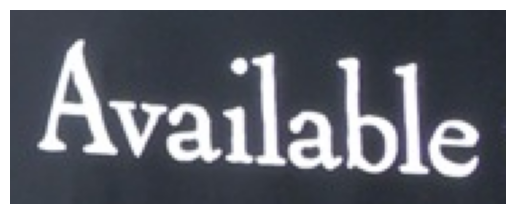

/content/crnn.pytorch
loading pretrained model from ./data/crnn.pth
a-----v--a-i-l-a-bb-l-e--- => available           


In [ ]:
# 첫번째 demo 이미지 읽기
img_path = '/content/crnn.pytorch/data/demo.png'
plt.imshow(np.array(Image.open(img_path).convert('RGB')))
plt.axis('off'); plt.show()
%cd /content/crnn.pytorch
!python /content/crnn.pytorch/demo.py

In [ ]:
%cd /content/crnn.pytorch/data
!wget https://github.com/bgshih/crnn/raw/master/data/demo2.jpg
# /content/crnn.pytorch/demo.py의 demo.png를 demo2.jpg로 변경

/content/crnn.pytorch/data
--2023-05-18 16:25:56--  https://github.com/bgshih/crnn/raw/master/data/demo2.jpg
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/bgshih/crnn/master/data/demo2.jpg [following]
--2023-05-18 16:25:56--  https://raw.githubusercontent.com/bgshih/crnn/master/data/demo2.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6740 (6.6K) [image/jpeg]
Saving to: ‘demo2.jpg’

demo2.jpg           100%[===================>]   6.58K  --.-KB/s    in 0s      

2023-05-18 16:25:56 (70.5 MB/s) - ‘demo2.jpg’ saved [6740/6740]



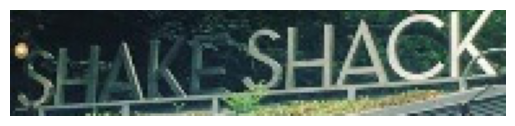

/content/crnn.pytorch
loading pretrained model from ./data/crnn.pth
ss-h-a--k-e-ssh--aa-c--k-- => shakeshack          


In [ ]:
# 두번째 demo 이미지 읽기
img_path = '/content/crnn.pytorch/data/demo2.jpg'
plt.imshow(np.array(Image.open(img_path).convert('RGB')))
plt.axis('off'); plt.show()
%cd /content/crnn.pytorch
!python /content/crnn.pytorch/demo.py

In [ ]:
# word 이미지가 아니라 줄 글 이미지를 넣으면(여러 bbox가 존재하는 이미지)
# 무조건 하나의 단어를 입력값으로 기대하는 recognition model이 엉뚱한 결과 출력

## OCR use MMOCR
- detection, recognition을 각각 예측 또는 한 번에 예측 가능
- 언어 설정은 영어와 중국어
- 다양한 모델을 바꾸어가면서 실행시켜 볼 수 있음.

In [ ]:
!pip install -U openmim
!mim install mmengine
!mim install 'mmcv>=2.0.0rc1'
!mim install 'mmdet>=3.0.0rc0'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 2.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu118/torch2.0.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 372.1/372.1 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.9/200.9 kB 18.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu118/torch2.0.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.4/74.4 MB 2.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu118/torch2.0.0/index.html
     ━━━━━━━━━━━━━━━━

In [ ]:
%cd /content
!git clone https://github.com/open-mmlab/mmocr.git
%cd mmocr
!pip install -v -e .
# "-v" increases pip's verbosity.
# "-e" means installing the project in editable mode,
# That is, any local modifications on the code will take effect immediately.

/content
Cloning into 'mmocr'...
remote: Enumerating objects: 16277, done.
remote: Counting objects: 100% (188/188), done.
remote: Compressing objects: 100% (144/144), done.
remote: Total 16277 (delta 56), reused 138 (delta 42), pack-reused 16089
Receiving objects: 100% (16277/16277), 16.23 MiB | 20.22 MiB/s, done.
Resolving deltas: 100% (10663/10663), done.
/content/mmocr
Using pip 23.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/mmocr
  Running command python setup.py egg_info
  running egg_info
  creating /tmp/pip-pip-egg-info-sw9d4tnz/mmocr.egg-info
  writing /tmp/pip-pip-egg-info-sw9d4tnz/mmocr.egg-info/PKG-INFO
  writing dependency_links to /tmp/pip-pip-egg-info-sw9d4tnz/mmocr.egg-info/dependency_links.txt
  writing requirements to /tmp/pip-pip-egg-info-sw9d4tnz/mmocr.egg-info/requires.txt
  writing top-level names to /tmp/pip-pip-egg-i

In [ ]:
from mmocr.apis import MMOCRInferencer
import mmcv
import matplotlib.pyplot as plt

Loads checkpoint by http backend from path: https://download.openmmlab.com/mmocr/textrecog/svtr/svtr-small_20e_st_mj/svtr-small_20e_st_mj-35d800d6.pth


Downloading: "https://download.openmmlab.com/mmocr/textrecog/svtr/svtr-small_20e_st_mj/svtr-small_20e_st_mj-35d800d6.pth" to /root/.cache/torch/hub/checkpoints/svtr-small_20e_st_mj-35d800d6.pth


05/18 17:46:53 - mmengine - WARNING - Failed to search registry with scope "mmocr" in the "function" registry tree. As a workaround, the current "function" registry in "mmengine" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmocr" is a correct scope, or whether the registry is initialized.
05/18 17:46:53 - mmengine - WARNING - `Visualizer` backend is not initialized because save_dir is None.


Output()

[{'rec_texts': ['star'], 'rec_scores': [0.9995317906141281]}]


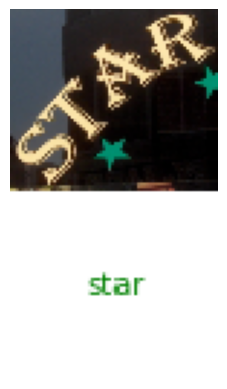

In [ ]:
# recognition
infer = MMOCRInferencer(rec='svtr-small')
result = infer('demo/demo_text_recog.jpg', return_vis=True)
print(result['predictions'])
plt.imshow(result['visualization'][0])
plt.axis('off'); plt.show()

Loads checkpoint by http backend from path: https://download.openmmlab.com/mmocr/textdet/dbnetpp/dbnetpp_resnet50-oclip_fpnc_1200e_icdar2015/dbnetpp_resnet50-oclip_fpnc_1200e_icdar2015_20221101_124139-4ecb39ac.pth


Downloading: "https://download.openmmlab.com/mmocr/textdet/dbnetpp/dbnetpp_resnet50-oclip_fpnc_1200e_icdar2015/dbnetpp_resnet50-oclip_fpnc_1200e_icdar2015_20221101_124139-4ecb39ac.pth" to /root/.cache/torch/hub/checkpoints/dbnetpp_resnet50-oclip_fpnc_1200e_icdar2015_20221101_124139-4ecb39ac.pth


Output()

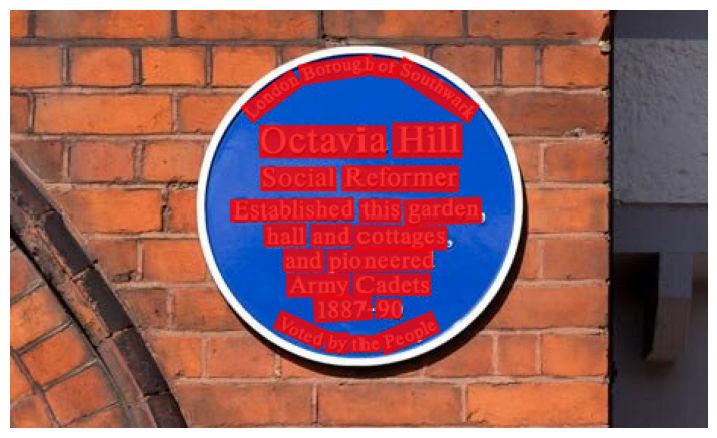

In [ ]:
# detection
infer = MMOCRInferencer(det='dbnetpp')
result = infer('demo/demo_text_det.jpg', return_vis=True)
plt.figure(figsize=(9, 16))
plt.imshow(result['visualization'][0])
plt.axis('off'); plt.show()

Loads checkpoint by http backend from path: https://download.openmmlab.com/mmocr/textdet/dbnetpp/dbnetpp_resnet50-oclip_fpnc_1200e_icdar2015/dbnetpp_resnet50-oclip_fpnc_1200e_icdar2015_20221101_124139-4ecb39ac.pth
Loads checkpoint by http backend from path: https://download.openmmlab.com/mmocr/textrecog/svtr/svtr-small_20e_st_mj/svtr-small_20e_st_mj-35d800d6.pth


Output()

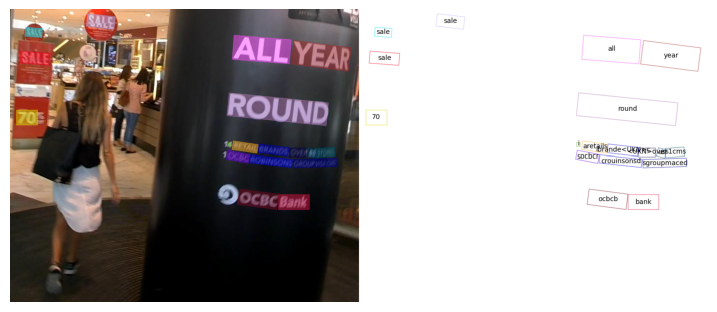

In [ ]:
# detection, recognition
infer = MMOCRInferencer(det='dbnetpp', rec='svtr-small')
result = infer('demo/demo_text_ocr.jpg', return_vis=True)
plt.figure(figsize=(9, 16))
plt.imshow(result['visualization'][0])
plt.axis('off'); plt.show()

Loads checkpoint by http backend from path: https://download.openmmlab.com/mmocr/textdet/dbnetpp/dbnetpp_resnet50-oclip_fpnc_1200e_icdar2015/dbnetpp_resnet50-oclip_fpnc_1200e_icdar2015_20221101_124139-4ecb39ac.pth
Loads checkpoint by http backend from path: https://download.openmmlab.com/mmocr/textrecog/svtr/svtr-small_20e_st_mj/svtr-small_20e_st_mj-35d800d6.pth


Output()

Loads checkpoint by http backend from path: https://download.openmmlab.com/mmocr/kie/sdmgr/sdmgr_unet16_60e_wildreceipt/sdmgr_unet16_60e_wildreceipt_20220825_151648-22419f37.pth
The model and loaded state dict do not match exactly

unexpected key in source state_dict: data_preprocessor.mean, data_preprocessor.std



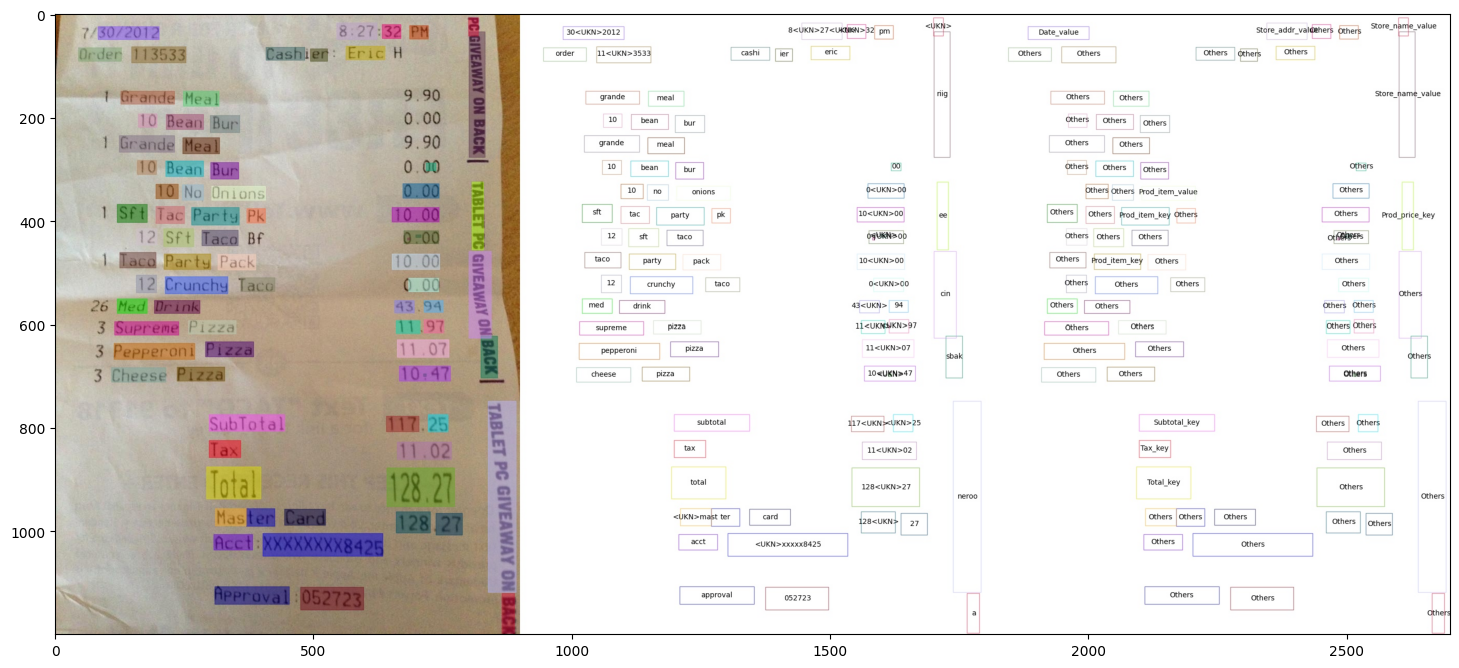

In [ ]:
# detection, recognition, key information extract(kie)
infer = MMOCRInferencer(det='dbnetpp', rec='svtr-small', kie='SDMGR')
result = infer('demo/demo_kie.jpeg', save_vis=True)
predicted_img = mmcv.imread('results/vis/demo_kie.jpg')
plt.figure(figsize=(18, 32))
plt.imshow(mmcv.bgr2rgb(predicted_img))
plt.axis('off'); plt.show()

## OCR use EasyOCR
- detection과 recognition 과정이 연결되어 있어 한 번에 예측
- 언어 설정 가능
- 한글 언어 예측이 조금 약한 듯 함
- craft, dbnet을 dectection으로 사용, recognition에는 CRNN을 기반한 모델 사용(CNN-BiLSTM-Att)

In [1]:
!pip install easyocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.6/47.6 MB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 813.9/813.9 kB 34.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 kB 12.1 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.7.0.72
    Uninstalling opencv-python-headless-4.7.0.72:
      Successfully uninstalled opencv-python-headless-4.7.0.72


In [1]:
from matplotlib import pyplot as plt
from easyocr import Reader
import cv2
import requests
import numpy as np
from PIL import ImageFont, ImageDraw, Image

In [2]:
# image 가져오기
%cd /content/
!wget https://github.com/PaulowniaTree/mini_project_4/raw/jinn0135/Temp/temp_Sign/000D6985A1C98F0549F53FEE4FA556B8.jpg
img_path = '/content/000D6985A1C98F0549F53FEE4FA556B8.jpg'
img = np.array(Image.open(img_path).convert('RGB'))

In [3]:
# 언어설정, 예측
langs = ['ko', 'en']
print("[INFO] OCR'ing input image...")
reader = Reader(lang_list=langs, gpu=True)
results = reader.readtext(img)
results

[INFO] OCR'ing input image...


[([[618, 363], [1043, 363], [1043, 504], [618, 504]],
  '동서움 ESeout',
  0.5296965903247408),
 ([[1117, 416], [1300, 416], [1300, 508], [1117, 508]],
  '28xm',
  0.9402625094886273),
 ([[618, 491], [1100, 491], [1100, 624], [618, 624]],
  '경기광주분기점',
  0.989050429268011),
 ([[1171, 541], [1299, 541], [1299, 627], [1171, 627]],
  '6km',
  0.7471410632133484),
 ([[620, 602], [1047, 602], [1047, 740], [620, 740]],
  '초월 [howol',
  0.6768469357845729),
 ([[1168, 651], [1303, 651], [1303, 742], [1168, 742]],
  '6xm',
  0.38102395349546675),
 ([[218, 1142], [423, 1142], [423, 1187], [218, 1187]],
  '터널 진입차단시설',
  0.9364762667359815),
 ([[499, 1211], [541, 1211], [541, 1225], [499, 1225]],
  'UVen',
  0.01204198319464922),
 ([[257, 1215], [347, 1215], [347, 1239], [257, 1239]],
  '곧지암2 터널',
  0.724832844284022),
 ([[892, 1372], [978, 1372], [978, 1398], [892, 1398]],
  '터브길이t Ggbm',
  0.11875995827452698)]

In [4]:
simple_results = reader.readtext(img, detail=0)
simple_results

['동서움 ESeout',
 '28xm',
 '경기광주분기점',
 '6km',
 '초월 [howol',
 '6xm',
 '터널 진입차단시설',
 'UVen',
 '곧지암2 터널',
 '터브길이t Ggbm']

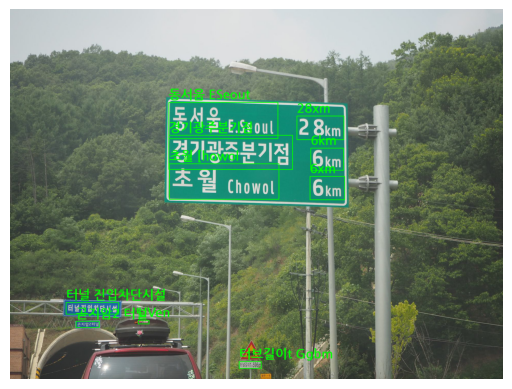

In [5]:
trans_img = img.copy()
def putText(cv_img, text, x, y, color=(0,0,0), font_s=22):
    font = ImageFont.truetype('/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf', font_s)
    img = Image.fromarray(cv_img)
    draw = ImageDraw.Draw(img)
    draw.text((x, y), text, font=font, fill=color)
    cv_img = np.array(img)
    return cv_img

for (bbox, text, prob) in results:
    # print('{:.4f}: {}'.format(prob, text))
    pts = [(int(p[0]), int(p[1])) for p in bbox]
    cv2.rectangle(trans_img, pts[0], pts[2], (0,255,0), 2)
    trans_img = putText(trans_img, text, pts[0][0], pts[0][1]-60, (0,255,0), 50)
plt.imshow(trans_img)
plt.axis('off')
plt.show()